In [17]:
import numpy as np
from scipy.integrate import solve_ivp

In [18]:
def function_S(input):
    # input should be array
    # output array
    flattened_input = input.flatten()
    output = [[0,           -flattened_input[2],    flattened_input[1]],
              [flattened_input[2],  0,              -flattened_input[0]],
              [-flattened_input[1], flattened_input[0],     0]]
    return np.array(output)

test_quaternion = np.array([0.5573849, 0.6656843, 0.4437895, 0.2218948]).T  # quaternion: w, x, y, z
test_cross = np.array([1, 2, 3]).T  # quaternion: w, x, y, z
print("source", test_quaternion[1:], '\t', test_cross)
cross = np.cross(test_quaternion[1:], test_cross)
print("cross" ,cross)
matmul = np.matmul(function_S(test_quaternion[1:]), test_cross)
print("matmul", matmul)
print("cross-matmul", cross-matmul)

source [0.6656843 0.4437895 0.2218948] 	 [1 2 3]
cross [ 0.8875789 -1.7751581  0.8875791]
matmul [ 0.8875789 -1.7751581  0.8875791]
cross-matmul [-1.11022302e-16  2.22044605e-16  0.00000000e+00]


In [46]:
def rodrigues_formula(quaternion):
    '''
    quaternion -> R_tilde_bar
    input: [w,x,y,z]
    output R_tile_bar (rotation matrix)
    From page6
    '''
    print("quaternion[0]*np.eye(3) \n", quaternion[0]*np.eye(3), "\n ----------------------------------")
    print("function_S(quaternion[1:]) \n", function_S(quaternion[1:]), "\n ----------------------------------")
    print("(quaternion[0]*np.eye(3) + function_S(quaternion[1:])) \n",  (quaternion[0]*np.eye(3) + function_S(quaternion[1:])), "\n ----------------------------------")
    print("quaternion[1:] \n", quaternion[1:], "\n ----------------------------------")
    print("function_S(quaternion[1:]) \n", function_S(quaternion[1:]), "\n ----------------------------------")
    print("np.matmul(function_S(quaternion[1:]), (quaternion[0]*np.eye(3) + function_S(quaternion[1:]))) \n", np.matmul(function_S(quaternion[1:]), (quaternion[0]*np.eye(3) + function_S(quaternion[1:]))), "\n ----------------------------------")
    print("2*np.matmul(function_S(quaternion[1:]), (quaternion[0]*np.eye(3) + function_S(quaternion[1:]))) \n", 2*np.matmul(function_S(quaternion[1:]), (quaternion[0]*np.eye(3) + function_S(quaternion[1:]))), "\n ----------------------------------")
    print("np.eye(3) + 2*np.matmul(function_S(quaternion[1:]), (quaternion[0]*np.eye(3) + function_S(quaternion[1:]))) \n", np.eye(3) + 2*np.matmul(function_S(quaternion[1:]), (quaternion[0]*np.eye(3) + function_S(quaternion[1:]))), "\n ----------------------------------")

    return np.eye(3) + 2*np.matmul(function_S(quaternion[1:]), (quaternion[0]*np.eye(3) + function_S(quaternion[1:])))
test_quaternion = np.array([0.5573849, 0.6656843, 0.4437895, 0.2218948])  # quaternion: w, x, y, z
rodrigues_formula(test_quaternion)

quaternion[0]*np.eye(3) 
 [[0.5573849 0.        0.       ]
 [0.        0.5573849 0.       ]
 [0.        0.        0.5573849]] 
 ----------------------------------
function_S(quaternion[1:]) 
 [[ 0.        -0.2218948  0.4437895]
 [ 0.2218948  0.        -0.6656843]
 [-0.4437895  0.6656843  0.       ]] 
 ----------------------------------
(quaternion[0]*np.eye(3) + function_S(quaternion[1:])) 
 [[ 0.5573849 -0.2218948  0.4437895]
 [ 0.2218948  0.5573849 -0.6656843]
 [-0.4437895  0.6656843  0.5573849]] 
 ----------------------------------
quaternion[1:] 
 [0.6656843 0.4437895 0.2218948] 
 ----------------------------------
function_S(quaternion[1:]) 
 [[ 0.        -0.2218948  0.4437895]
 [ 0.2218948  0.        -0.6656843]
 [-0.4437895  0.6656843  0.       ]] 
 ----------------------------------
np.matmul(function_S(quaternion[1:]), (quaternion[0]*np.eye(3) + function_S(quaternion[1:]))) 
 [[-0.24618642  0.17174289  0.39507345]
 [ 0.41910451 -0.49237289 -0.27256779]
 [-0.09964968  0.4695169

array([[ 0.50762715,  0.34348578,  0.7901469 ],
       [ 0.83820903,  0.01525422, -0.54513559],
       [-0.19929936,  0.93903392, -0.28016942]])

In [44]:
l = 3
k = 1
q = [10, 10, 10]
Q = np.diag(np.hstack([np.diag(q[0]*np.eye(3)), np.diag(q[1]*np.eye(3)), np.diag(q[2]*np.eye(3))]))
V = np.diag(np.hstack([np.diag(0.1*np.eye(3)), np.diag(np.eye(3))]))
P_0 = np.diag(np.hstack([np.diag(np.eye(3)), np.diag(100*np.eye(3))]))

#initial state
p_0 = np.array([[2.5, 0, 10]], dtype=np.float64).T
R_0 = np.eye(3)

#initial estimation
p_hat_0 = np.array([[-2, 4, 3]], dtype=np.float64).T
Lambda_bar_0 = np.array([np.sqrt(2)/2, np.sqrt(2)/2, 0, 0])  # quaternion: w, x, y, z

## R_hat = R x R_tilde_bar
R_hat_0 = np.matmul(R_0, rodrigues_formula(Lambda_bar_0))

# landmarks
z = np.array([[[0, 0, 0]], 
              [[5, 0, 0]],
              [[2.5, 2.5, 0]]])

quaternion[0]*np.eye(3) 
 [[0.70710678 0.         0.        ]
 [0.         0.70710678 0.        ]
 [0.         0.         0.70710678]] 
 ----------------------------------
function_S(quaternion[1:]) 
 [[ 0.         -0.          0.        ]
 [ 0.          0.         -0.70710678]
 [-0.          0.70710678  0.        ]] 
 ----------------------------------
(quaternion[0]*np.eye(3) + function_S(quaternion[1:])) 
 [[ 0.70710678  0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]] 
 ----------------------------------
quaternion[1:] 
 [0.70710678 0.         0.        ] 
 ----------------------------------
function_S(quaternion[1:]) 
 [[ 0.         -0.          0.        ]
 [ 0.          0.         -0.70710678]
 [-0.          0.70710678  0.        ]] 
 ----------------------------------
np.matmul(function_S(quaternion[1:]), (quaternion[0]*np.eye(3) + function_S(quaternion[1:]))) 
 [[ 0.   0.   0. ]
 [ 0.  -0.5 -0.5]
 [ 0.   0.5 -0.5]] 
 ------

In [41]:
def function_A(omega):
    A11 = -function_S(omega)
    print("A11 \n", A11, "\n ------------------------------------")
    A12 = np.zeros((3,3))
    print("A11 \n", A12, "\n ------------------------------------")
    A21 = np.zeros((3,3))
    print("A11 \n", A21, "\n ------------------------------------")
    A22 = -function_S(omega)
    print("A11 \n", A22, "\n ------------------------------------")
    return np.vstack((np.hstack((A11, A12)), np.hstack((A21, A22))))

test_omega = np.transpose(np.array([[1, 2, 3]]))
print(test_omega)
function_A(test_omega)


[[1]
 [2]
 [3]]
A11 
 [[ 0  3 -2]
 [-3  0  1]
 [ 2 -1  0]] 
 ------------------------------------
A11 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 
 ------------------------------------
A11 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 
 ------------------------------------
A11 
 [[ 0  3 -2]
 [-3  0  1]
 [ 2 -1  0]] 
 ------------------------------------


array([[ 0.,  3., -2.,  0.,  0.,  0.],
       [-3.,  0.,  1.,  0.,  0.,  0.],
       [ 2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3., -2.],
       [ 0.,  0.,  0., -3.,  0.,  1.],
       [ 0.,  0.,  0.,  2., -1.,  0.]])

In [47]:
def function_Pi(input):
    '''
    Pi_x := I_3 - xx^T
    input: array
    output P_x
    '''
    print("np.matmul(input, np.transpose(input))", np.matmul(input, np.transpose(input)), "\n -------------------------")
    return np.eye(3) - np.matmul(input, np.transpose(input))

test_input = np.array([[1, 2, 3]]).T  # quaternion: w, x, y, z
print(test_input)
function_Pi(test_input)

[[1]
 [2]
 [3]]
np.matmul(input, np.transpose(input)) [[1 2 3]
 [2 4 6]
 [3 6 9]] 
 -------------------------


array([[ 0., -2., -3.],
       [-2., -3., -6.],
       [-3., -6., -8.]])

In [56]:
def function_d(input_rot, input_p, input_z):
    '''
    calculate d_i(t) := R^T(t)(p(t) - z_i)/|p(t)-z_i|
    '''
    print("(input_p - input_z) \n", (input_p - input_z), "\n ------------------------------------")
    print("np.linalg.norm(input_p - input_z) \n", np.linalg.norm(input_p - input_z), "\n ------------------------------------")
    print("(input_p - input_z)/np.linalg.norm(input_p - input_z) \n", (input_p - input_z)/np.linalg.norm(input_p - input_z), "\n ------------------------------------")
    norm = (input_p - input_z)/np.linalg.norm(input_p - input_z)
    print("np.matmul(np.transpose(input_rot), norm) \n", np.matmul(np.transpose(input_rot), norm), "\n ------------------------------------")

    return np.matmul(np.transpose(input_rot), norm)

R_test = np.array([[0.5076271, 0.3434859, 0.7901469],
                   [0.8382091, 0.0152542, -0.5451356],
                   [-0.1992995, 0.9390339, -0.2801695]])
R_test = np.array([[0.1, 1, 10],
                   [0.2, 2, 20],
                   [0.3, 3, 30]])
#(90, 60, 30) xyz
p_test = np.array([[1, 2, 3]], dtype=np.float64).T
z_test = np.array([[[4, 5, 6]], [[7, 8, 9]]])
print("R_test \n", np.transpose(R_test), "\n ------------------------------------")
print("p_test \n", p_test, "\n ------------------------------------")
print("np.transpose(z_test[1]) \n", np.transpose(z_test[1]), "\n ------------------------------------")
function_d(R_test, p_test, np.transpose(z_test[1]))

R_test 
 [[ 0.1  0.2  0.3]
 [ 1.   2.   3. ]
 [10.  20.  30. ]] 
 ------------------------------------
p_test 
 [[1.]
 [2.]
 [3.]] 
 ------------------------------------
np.transpose(z_test[1]) 
 [[7]
 [8]
 [9]] 
 ------------------------------------
(input_p - input_z) 
 [[-6.]
 [-6.]
 [-6.]] 
 ------------------------------------
np.linalg.norm(input_p - input_z) 
 10.392304845413264 
 ------------------------------------
(input_p - input_z)/np.linalg.norm(input_p - input_z) 
 [[-0.57735027]
 [-0.57735027]
 [-0.57735027]] 
 ------------------------------------
np.matmul(np.transpose(input_rot), norm) 
 [[ -0.34641016]
 [ -3.46410162]
 [-34.64101615]] 
 ------------------------------------


array([[ -0.34641016],
       [ -3.46410162],
       [-34.64101615]])

In [62]:
def function_C(input_R, input_R_hat, input_p, input_z):
    for landmark_idx in range(l):
        # S(R_hat.T x z)
        #TODO: remember to change the R_0 and p_0 below for gerenal
        first = function_Pi(function_d(input_R, input_p, np.transpose(input_z[landmark_idx])))
        second = function_S(np.matmul(np.transpose(input_R_hat), np.transpose(input_z[landmark_idx])))
        print("first \n", first, "\n ------------------------------------")
        print("second \n",second, "\n ------------------------------------")
        final = -np.matmul(first, second)
        print("final \n", final, "\n ------------------------------------")
        C_landmark = np.hstack((final, first))
        if landmark_idx == 0:
            output_C = C_landmark
        else:
            output_C = np.vstack((output_C, C_landmark))
        print("output_C \n",output_C, "\n ------------------------------------")

    return output_C

R_test = np.array([[-0.1, -1, -10],
                   [-0.2, -2, -20],
                   [-0.3, -3, -30]])

R_hat_test = np.array([[0.1, 1, 10],
                   [0.2, 2, 20],
                   [0.3, 3, 30]])
p_test = np.array([[1, 2, 3]], dtype=np.float64).T

z_test = np.array([[[4, 5, 6]], [[7, 8, 9]], [[10, 11, 12]]])

function_C(R_test, R_hat_test, p_test, z_test)

(input_p - input_z) 
 [[-3.]
 [-3.]
 [-3.]] 
 ------------------------------------
np.linalg.norm(input_p - input_z) 
 5.196152422706632 
 ------------------------------------
(input_p - input_z)/np.linalg.norm(input_p - input_z) 
 [[-0.57735027]
 [-0.57735027]
 [-0.57735027]] 
 ------------------------------------
np.matmul(np.transpose(input_rot), norm) 
 [[ 0.34641016]
 [ 3.46410162]
 [34.64101615]] 
 ------------------------------------
np.matmul(input, np.transpose(input)) [[1.2e-01 1.2e+00 1.2e+01]
 [1.2e+00 1.2e+01 1.2e+02]
 [1.2e+01 1.2e+02 1.2e+03]] 
 -------------------------
first 
 [[ 8.800e-01 -1.200e+00 -1.200e+01]
 [-1.200e+00 -1.100e+01 -1.200e+02]
 [-1.200e+01 -1.200e+02 -1.199e+03]] 
 ------------------------------------
second 
 [[   0.  -320.    32. ]
 [ 320.     0.    -3.2]
 [ -32.     3.2    0. ]] 
 ------------------------------------
final 
 [[ 5.68434189e-14  3.20000000e+02 -3.20000000e+01]
 [-3.20000000e+02 -2.41584530e-14  3.20000000e+00]
 [ 3.20000000e+01 -3

array([[ 5.68434189e-14,  3.20000000e+02, -3.20000000e+01,
         8.80000000e-01, -1.20000000e+00, -1.20000000e+01],
       [-3.20000000e+02, -2.41584530e-14,  3.20000000e+00,
        -1.20000000e+00, -1.10000000e+01, -1.20000000e+02],
       [ 3.20000000e+01, -3.20000000e+00, -3.26849658e-14,
        -1.20000000e+01, -1.20000000e+02, -1.19900000e+03],
       [ 8.88178420e-14,  5.00000000e+02, -5.00000000e+01,
         8.80000000e-01, -1.20000000e+00, -1.20000000e+01],
       [-5.00000000e+02, -7.10542736e-14,  5.00000000e+00,
        -1.20000000e+00, -1.10000000e+01, -1.20000000e+02],
       [ 5.00000000e+01, -5.00000000e+00, -4.26325641e-14,
        -1.20000000e+01, -1.20000000e+02, -1.19900000e+03],
       [ 1.20792265e-13,  6.80000000e+02, -6.80000000e+01,
         8.80000000e-01, -1.20000000e+00, -1.20000000e+01],
       [-6.80000000e+02, -1.17950094e-13,  6.80000000e+00,
        -1.20000000e+00, -1.10000000e+01, -1.20000000e+02],
       [ 6.80000000e+01, -6.80000000e+00,  4.263

In [58]:
def add_bar(input_rot, input_p):
    return np.matmul(np.transpose(input_rot), input_p)

R_test = np.array([[0.1, 1, 10],
                   [0.2, 2, 20],
                   [0.3, 3, 30]])
p_test = np.array([[4, 5, 6]], dtype=np.float64).T
print("R_test \n", np.transpose(R_test), "\n ------------------------------------")
print("p_test \n", p_test, "\n ------------------------------------")
add_bar(R_test, p_test)

R_test 
 [[ 0.1  0.2  0.3]
 [ 1.   2.   3. ]
 [10.  20.  30. ]] 
 ------------------------------------
p_test 
 [[4.]
 [5.]
 [6.]] 
 ------------------------------------


array([[  3.2],
       [ 32. ],
       [320. ]])

In [26]:
# def function_K(input_P, input_C, input_Q, input_k):
#     #TODO: HAVENT CHECK THIS FUNCTION
#     return input_k* np.matmul(input_P, np.matmul(np.transpose(input_C), input_Q))

In [27]:
# def remove_bar(input_R, input_p):
#     return np.matmul(np.transpose(np.linalg.inv(input_R)), input_p)

In [28]:

def dynamics(t, y, input_k, input_z, input_Q, input_V):
    # pose
    input_p = np.transpose(np.array([[2.5+2.5*np.cos(0.4*t), 2.5*np.sin(0.4*t), 10]]))

    ########################
    ##### Measurements #####
    # velocity
    input_v = np.transpose(np.array([[-np.sin(0.4*t), np.cos(0.4*t), 0]]))
    # angular velocity
    input_omega = np.transpose(np.array([[0.1*np.sin(t), 0.4*np.cos(2*t), 0.6*t]]))
    ##### Measurements #####
    ########################

    # (Rot.flatten(), Rot_hat.flatten(), p_bar_hat.flatten(), P_ricatti.flatten())
    Rot_flat, Rot_hat_flat, p_bar_hat_flat, input_P_flat = np.split(y, [9, 18, 21])
    input_R = Rot_flat.reshape((3,3))
    input_R_hat = Rot_hat_flat.reshape((3,3))
    input_p_bar_hat = p_bar_hat_flat.reshape((3,1))
    input_P = input_P_flat.reshape((6,6))

    # input_R = np.matmul(input_R, function_S(input_omega))
    input_A = function_A(input_omega)
    input_C = function_C(input_R, input_R_hat, input_p, input_z)

    # omega_hat , p_bar_hat_dot
    # omega
    first_upper = input_omega
    
    # -S(omega)p_bat_hat + v_bar
    #TODO: change this for general (R_0)
    first_lower = -np.matmul(function_S(input_omega), input_p_bar_hat) + add_bar(input_R, input_v)
    first_part = np.vstack((first_upper, first_lower))

    # omega_hat second part upper
    final = np.transpose(np.array([[0, 0, 0]], dtype=np.float64))
    for landmark_idx in range(l):
        #q*S(R_hat.T x z)
        first = q[landmark_idx]*function_S(np.matmul(np.transpose(input_R_hat), np.transpose(input_z[landmark_idx])))
        #Pi_d
        #TODO: remember to change the R_0 and p_0 below for gerenal
        # second = function_Pi(function_d(input_R_hat, input_p_bar_hat, np.transpose(input_z[landmark_idx]))) #TODO
        second = function_Pi(function_d(input_R, input_p, np.transpose(input_z[landmark_idx]))) #TODO
        #(p_bar_hat - R_hat.T x z)
        third = input_p_bar_hat - np.matmul(np.transpose(input_R_hat), np.transpose(input_z[landmark_idx]))
        final += np.matmul(first, np.matmul(second, third))

    # omega_hat second part lower
    final2 = np.transpose(np.array([[0, 0, 0]], dtype=np.float64))
    for landmark_idx in range(l):
        #q*Pi_d
        #TODO: remember to change the R_0 and p_0 below for gerenal
        # first = q[landmark_idx]*function_Pi(function_d(input_R_hat, input_p_bar_hat, np.transpose(input_z[landmark_idx]))) #TODO
        first = q[landmark_idx]*function_Pi(function_d(input_R, input_p, np.transpose(input_z[landmark_idx]))) #TODO
        #(p_bar_hat - R_hat.T x z)
        second = input_p_bar_hat - np.matmul(np.transpose(input_R_hat), np.transpose(input_z[landmark_idx]))
        final2 += np.matmul(first, second)

    second_part = np.vstack((final, final2))
    #kP[]
    #full second part 
    second_part = input_k*np.matmul(input_P, second_part)

    # Final
    output_omega_hat_p_bar_hat_dot = first_part - second_part

    output_P_dot = np.matmul(input_A, input_P) + np.matmul(input_P, np.transpose(input_A)) - np.matmul(input_P, np.matmul(np.transpose(input_C), np.matmul(input_Q, np.matmul(input_C, input_P)))) + input_V
    
    omega_hat = output_omega_hat_p_bar_hat_dot[0:3]
    output_R_hat_dot = np.matmul(input_R_hat, function_S(omega_hat))
    p_bar_hat_dot = output_omega_hat_p_bar_hat_dot[3:]
    output_R = np.matmul(input_R, function_S(input_omega))

    # (Rot.flatten(), Rot_hat.flatten(), p_bar_hat.flatten(), P_ricatti.flatten())
    return np.concatenate((output_R.flatten(), output_R_hat_dot.flatten(), p_bar_hat_dot.flatten(), output_P_dot.flatten()))


In [29]:
from scipy.integrate import solve_ivp

##################################
##### scipy #####
##################################
time = (0, 50)
t = 0
######################################################
################# initialization #####################
######################################################
Rot = R_0
Rot_hat = R_hat_0 
p_hat = p_hat_0
p_bar_hat = add_bar(Rot_hat, p_hat)
P_ricatti = P_0

p = np.transpose(np.array([[2.5+2.5*np.cos(0.4*t), 2.5*np.sin(0.4*t), 10]]))
omega = np.transpose(np.array([[0.1*np.sin(t), 0.4*np.cos(2*t), 0.6*t]]))
initial_state = np.concatenate((Rot.flatten(), Rot_hat.flatten(), p_bar_hat.flatten(), P_ricatti.flatten()))

In [30]:
#current observer equations
sol = solve_ivp(dynamics, time, initial_state, args=(k, z, Q, V), t_eval=np.linspace(*time, 200), method="RK45", rtol=1e-9, atol=1e-9)

In [31]:
seesee = sol.y
# Rot_flat, Rot_hat_flat, p_hat_flat, input_P_flat
seesee = np.transpose(np.array(seesee))
est_p = seesee[:,18:21]
est_p

array([[-2.        ,  3.        , -4.        ],
       [ 3.81816366,  0.11514225,  9.22028368],
       [ 3.10831429,  0.27915271,  9.74039198],
       [ 2.79030555,  0.40604547,  9.85549474],
       [ 2.9963824 ,  0.46724321,  9.77893229],
       [ 3.67048941,  0.36639163,  9.54718127],
       [ 4.59626244, -0.02593159,  9.16493284],
       [ 5.44200758, -0.8154484 ,  8.69817968],
       [ 5.83799591, -2.01688547,  8.30366302],
       [ 5.45460554, -3.49778595,  8.14994245],
       [ 4.06809737, -4.95135393,  8.27876243],
       [ 1.65604304, -5.91707069,  8.52658407],
       [-1.46658325, -5.87958266,  8.61038198],
       [-4.58074059, -4.46404912,  8.36113879],
       [-6.70579613, -1.68339029,  7.91274182],
       [-6.93923163,  1.87917603,  7.61854983],
       [-4.85204842,  5.08334154,  7.71056195],
       [-0.84074787,  6.53518236,  8.02391976],
       [ 3.684897  ,  5.20629734,  8.12271615],
       [ 6.60219984,  1.20005974,  7.77407395],
       [ 6.10000992, -3.82040092,  7.241

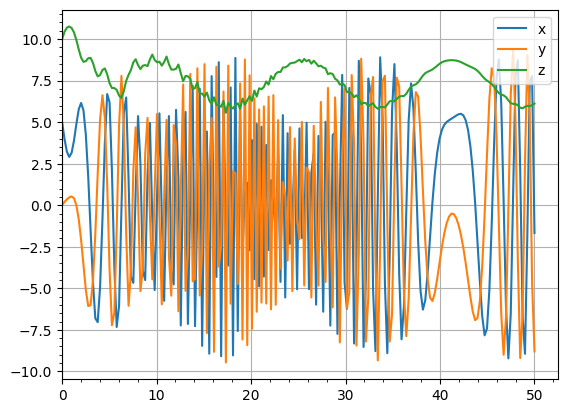

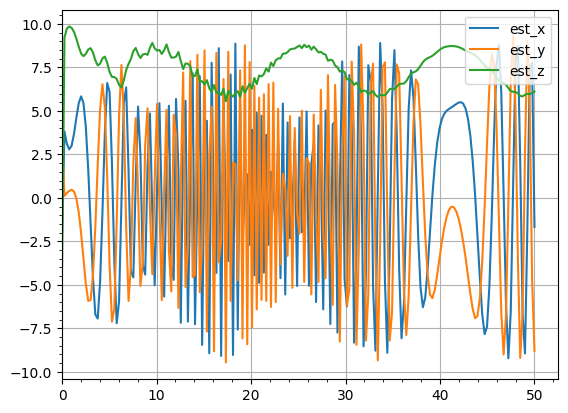

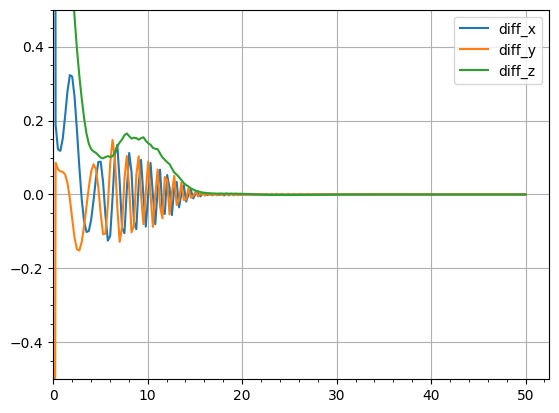

In [32]:
from copy import deepcopy
p_bar_print = []
sol_R = seesee[:,:9]
for t, rotation in zip(sol.t, sol_R):
    p = np.array([2.5+2.5*np.cos(0.4*t), 2.5*np.sin(0.4*t), 10])
    p_bar_temp = np.matmul(np.transpose(np.array(rotation).reshape((3,3))), p)
    p_bar_print.append(p_bar_temp)

import matplotlib.pyplot as plt
figure = plt.subplot()

plt.plot(sol.t, p_bar_print, label=["x", "y", "z"])
plt.xlim(0)
plt.legend(loc="upper right")
plt.grid()
plt.minorticks_on()
plt.show()

plt.plot(sol.t, est_p, label=["est_x", "est_y", "est_z"])
plt.xlim(0)
plt.legend(loc="upper right")
plt.grid()
plt.minorticks_on()
plt.show()

plt.plot(sol.t, p_bar_print-est_p, label=["diff_x", "diff_y", "diff_z"])
plt.xlim(0)
plt.ylim(-0.5, 0.5)
plt.grid()
plt.minorticks_on()
plt.legend(loc="upper right")
plt.show()

In [33]:

# def test_ivp(t, y, input_k, input_z, input_Q, input_V):
#     # pose
#     input_p = np.transpose(np.array([[2.5+2.5*np.cos(0.4*t), 2.5*np.sin(0.4*t), 10]]))
#     test_p = np.transpose(np.array([[2.5+2.5*np.cos(0.4*0), 2.5*np.sin(0.4*0), 10]]))
    
#     # velocity
#     input_v = np.transpose(np.array([[-np.sin(0.4*t), np.cos(0.4*t), 0]]))
#     # angular velocity
#     input_omega = np.transpose(np.array([[0.1*np.sin(t), 0.4*np.cos(2*t), 0.6*t]]))
    
#     # (Rot.flatten(), Rot_hat.flatten(), p_bar_hat.flatten(), P_ricatti.flatten())
#     Rot_flat, input_p_flat, input_p_bar_flat = np.split(y, [9, 12])
#     input_R = Rot_flat.reshape((3,3))
#     input_p = input_p_flat.reshape((3,1))
#     output_R = np.matmul(input_R, function_S(input_omega))
#     output_p_bar = np.matmul(np.transpose(output_R), input_p)
#     output_p = input_p
#     # (Rot.flatten(), Rot_hat.flatten(), p_bar_hat.flatten(), P_ricatti.flatten())
#     return np.concatenate((output_R.flatten(), output_p.flatten(), output_p_bar.flatten()))

# time = (0, 40)
# t = 0
# Rot_hat = R_hat_0 
# Rot = R_0
# p_hat = p_hat_0
# p_bar_hat = add_bar(Rot_hat, p_hat)
# p = np.transpose(np.array([[2.5+2.5*np.cos(0.4*t), 2.5*np.sin(0.4*t), 10]]))
# p_bar = np.matmul(np.transpose(Rot), p)
# omega = np.transpose(np.array([[0.1*np.sin(t), 0.4*np.cos(2*t), 0.6*t]]))
# P_ricatti = P_0
# initial_state = np.concatenate((Rot.flatten(), p.flatten(), p_bar.flatten()))
# #current observer equations
# sol2 = solve_ivp(test_ivp, time, initial_state, args=(k, z, Q, V), t_eval=np.linspace(*time, 200))


In [34]:
# # import matplotlib.pyplot as plt
# # figure = plt.subplot()

# plt.plot(sol2.t, np.transpose(np.array(sol2.y))[:, 12:], label=["x", "y", "z"])
# # plt.plot(sol2.t, np.transpose(np.array(sol2.y))[:, 9:12], label=["x", "y", "z"])
# plt.xlim(0,40)
# plt.legend()
# plt.show()